In [1]:
import os
import json

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
TITLE = 'resnet18-unet-1600s-aug-3px'

train_logs = pd.read_csv(os.path.join('..', 'experiments', 'pxs', TITLE, 'train-log.csv'))
valid_logs = pd.read_csv(os.path.join('..', 'experiments', 'pxs', TITLE, 'valid-log.csv'))

train_logs.head()

,epoch,dice_loss,positive_iou,negative_iou,true_negative_rate,false_positive_rate,false_negative_rate,true_positive_rate
0,0,0.943865,0.042528,0.647034,0.649254,0.350746,0.189645,0.810355
1,1,0.906986,0.104072,0.862934,0.864992,0.135008,0.126534,0.873466
2,2,0.879432,0.157776,0.919243,0.921815,0.078185,0.151259,0.848741
3,3,0.849845,0.202794,0.941237,0.944248,0.055752,0.173193,0.826807
4,4,0.819423,0.243347,0.954990,0.958327,0.041673,0.186458,0.813542


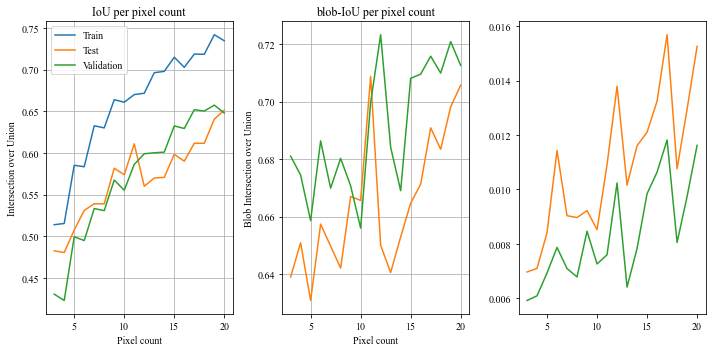

In [10]:
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["figure.figsize"] = (30, 15)

colors = plt.get_cmap('tab10').colors

experiments = [f'resnet18-unet-1600s-aug-{i}px' for i in range(3, 21)]
x = [i for i in range(3, 21)]

experiments_2 = [f'resnet18-unet-1600s-aug-{i}px' for i in range(30, 60, 10)]
x_2 = [30, 40, 50]

max_train_iou, max_valid_iou = [], []
max_train_biou, max_valid_biou = [], []

valid_fpr, test_fpr = [], []

for experiment in experiments:
    train_logs = pd.read_csv(os.path.join('..', 'experiments', 'pxs', experiment, 'train-log.csv'))
    valid_logs = pd.read_csv(os.path.join('..', 'experiments', 'pxs', experiment, 'valid-log.csv'))
    test_log = pd.read_csv(os.path.join('..', 'experiments', 'pxs', experiment, 'test-log.csv'))
    
    max_train_iou.append(train_logs.positive_iou.max())
    max_valid_iou.append(valid_logs.positive_iou.max())
    
    max_valid_biou.append(valid_logs.blob_iou.iloc[valid_logs.positive_iou.argmax()])
    
    valid_fpr.append(valid_logs.false_positive_rate.iloc[valid_logs.positive_iou.argmax()])
    test_fpr.append(test_log.false_positive_rate.iloc[0])

fig, ax = plt.subplots(1, 3, figsize=(10, 5))

ax[0].plot(x, max_train_iou, c=colors[0])

df = pd.read_csv(os.path.join('..', 'data', 'test-pxs-results.csv'))

ax[0].plot(x, df.positive_iou.iloc[:-3], c=colors[1])
ax[1].plot(x, df.blob_iou.iloc[:-3], c=colors[1])

ax[0].plot(x, max_valid_iou, c=colors[2])
ax[1].plot(x, max_valid_biou, c=colors[2])

ax[2].plot(x, valid_fpr, c=colors[2])
ax[2].plot(x, test_fpr, c=colors[1])

ax[0].set_title('IoU per pixel count')
ax[1].set_title('blob-IoU per pixel count')

ax[0].set_xlabel('Pixel count')
ax[1].set_xlabel('Pixel count')

ax[0].set_ylabel('Intersection over Union')
ax[1].set_ylabel('Blob Intersection over Union')

ax[0].legend(['Train', 'Test', 'Validation'])

plt.tight_layout()

ax[0].grid()
ax[1].grid()

plt.savefig('iouvsbiou.pdf') 